In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/sample_data/soil_dataset_sample2.csv')
dataset.head()



,Unnamed: 0,plot,seq,seqcode,stage,stagenum,bact,fung,bulkdens,co3,...,nema_plant_root,nema_bact,nema_fung,nema_omni,nema_carni,collem,mites_fung,mites_pred,LAI,wet
0,1,B.HR.2,Jurien Bay,JB,5,5,0.072974,0.87048,1.10,0.0,...,0.063677,0.298357,0.041701,0.117603,0.026776,0.048686,0.078552,0.114601,0.4625,1
1,2,B.L.4,Jurien Bay,JB,5,5,0.056706,0.31806,1.10,0.0,...,0.041813,0.166463,0.095866,0.162888,0.017028,0.386764,0.085031,0.120934,0.2775,1
2,3,B.L.6,Jurien Bay,JB,5,5,0.046596,0.34038,1.10,0.0,...,0.042981,0.149079,0.044966,0.149128,0.003582,0.112980,0.076646,0.046183,0.2700,1
3,4,B.NL.1,Jurien Bay,JB,5,5,0.058274,0.49290,1.10,0.0,...,0.027029,0.209083,0.077870,0.176190,0.021166,0.103829,0.113702,0.097130,0.3200,1
4,5,GUI-BAS-A,Guilderton,GUI,5,5,0.064782,0.54312,1.31,0.0,...,0.054793,0.135409,0.056683,0.070539,0.031071,0.118796,0.146756,0.128624,0.5725,2


In [ ]:
dataset.isnull().sum()/dataset.shape[0]

,0
Unnamed: 0,0.0
plot,0.0
seq,0.0
seqcode,0.0
stage,0.0
stagenum,0.0
bact,0.0
fung,0.0
bulkdens,0.0
co3,0.0


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
print(dataset['wet'].unique())

[1 2 4 3]


In [ ]:
for i in dataset.select_dtypes(include='object').columns:
  print(dataset.value_counts(i))
  print('----'*10)

plot
B.HR.2      1
B.L.4       1
WAR-SY-C    1
WAR-SY-B    1
WAR-SY-A    1
           ..
Q.M.23      1
Q.M.18      1
GUI-SY-D    1
GUI-SY-C    1
YAL-SY-D    1
Name: count, Length: 80, dtype: int64
----------------------------------------
seq
Guilderton    20
Jurien Bay    20
Warren        20
Yalgorup      20
Name: count, dtype: int64
----------------------------------------
seqcode
GUI    20
JB     20
WAR    20
YAL    20
Name: count, dtype: int64
----------------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

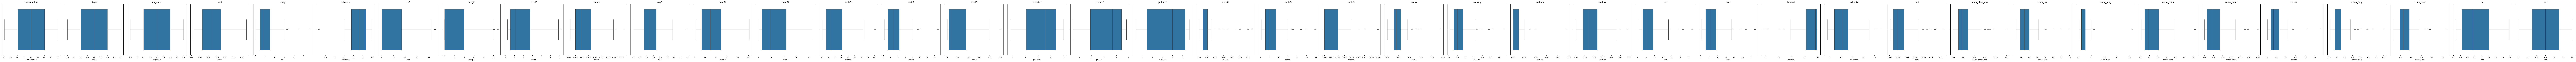

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
# Get the numerical columns
num_columns = dataset.select_dtypes(include='number').columns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(num_columns), figsize=(len(num_columns)*5, 5))

# Plot boxplots for each numerical column
for i, col in enumerate(num_columns):
    sb.boxplot(data=dataset, x=col, ax=axes[i])
    axes[i].set_title(col)

# Display the plot
plt.tight_layout()
plt.show()



In [ ]:
print(dataset.select_dtypes(include='number').columns)


Index(['Unnamed: 0', 'stage', 'stagenum', 'bact', 'fung', 'bulkdens', 'co3',
       'inorgC', 'totalC', 'totalN', 'orgC', 'naohPt', 'naohPi', 'naohPo',
       'resinP', 'totalP', 'pHwater', 'pHcacl2', 'pHbacl2', 'exchAl', 'exchCa',
       'exchFe', 'exchK', 'exchMg', 'exchMn', 'exchNa', 'teb', 'ecec',
       'basesat', 'soilmoist', 'root', 'nema_plant_root', 'nema_bact',
       'nema_fung', 'nema_omni', 'nema_carni', 'collem', 'mites_fung',
       'mites_pred', 'LAI', 'wet'],
      dtype='object')


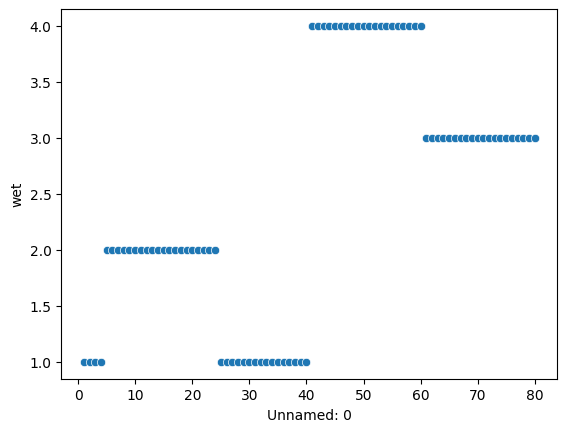

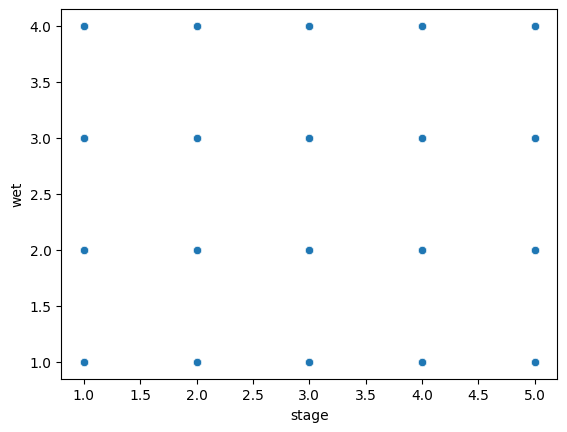

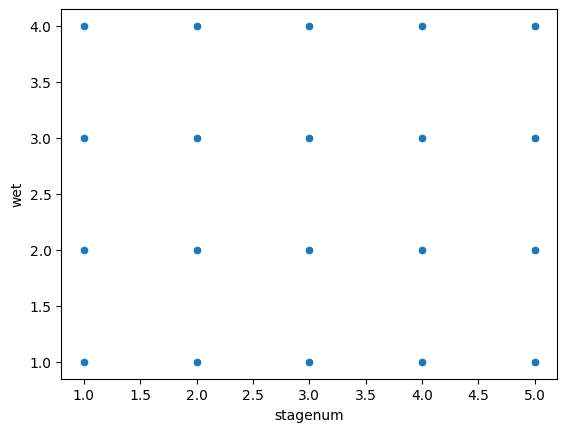

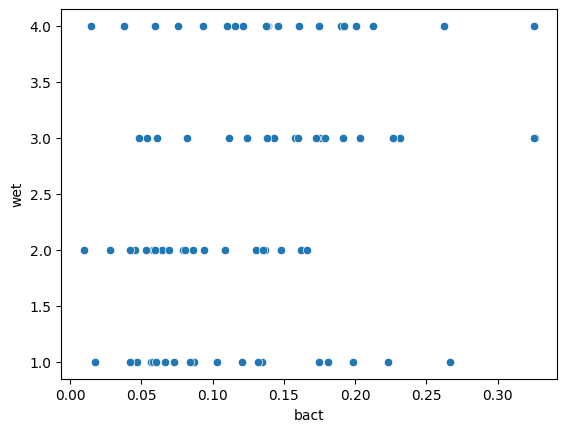

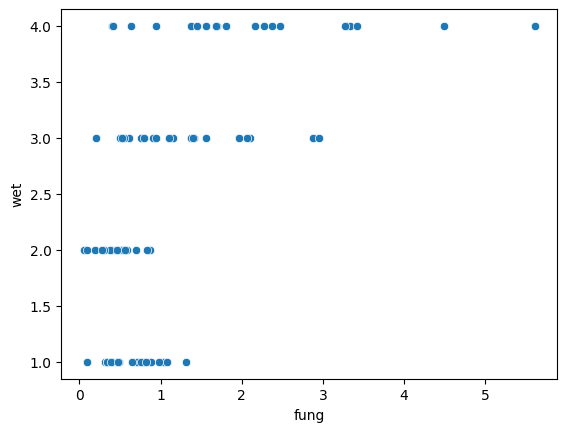

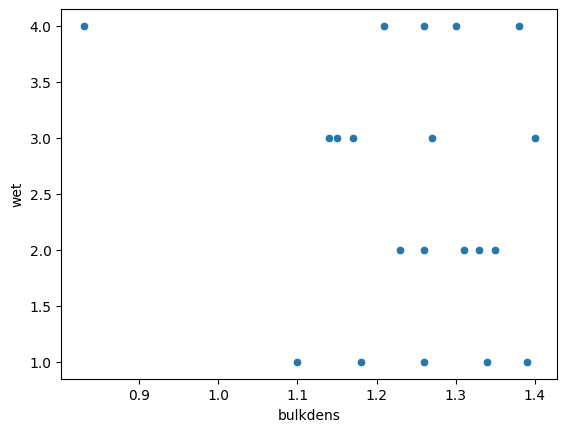

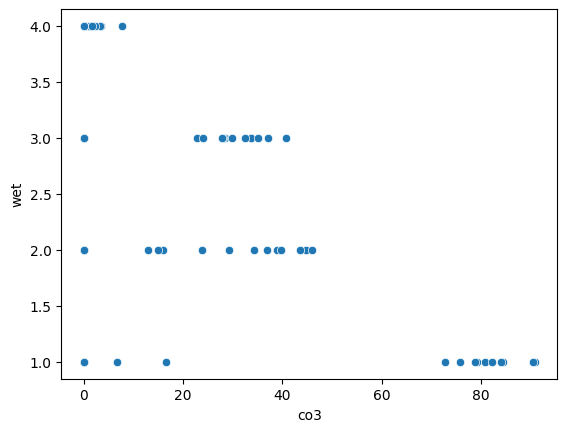

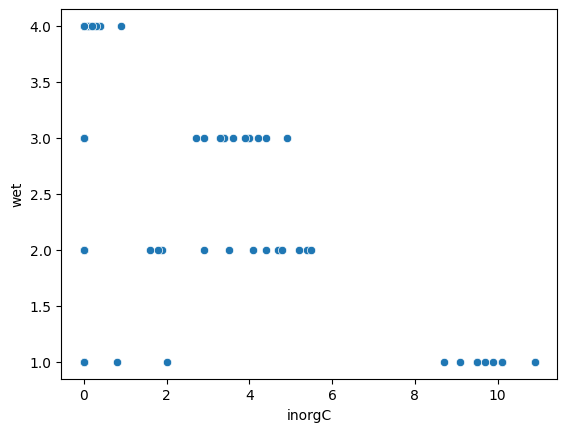

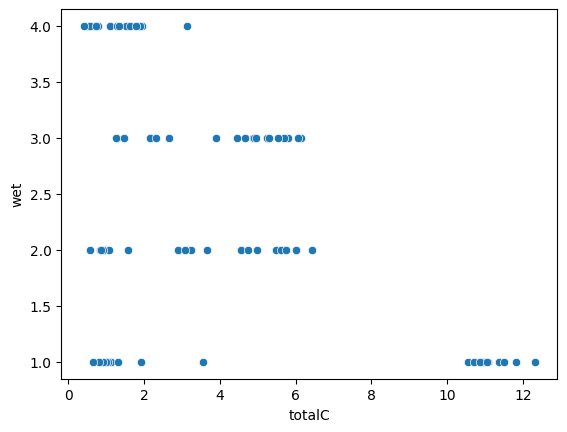

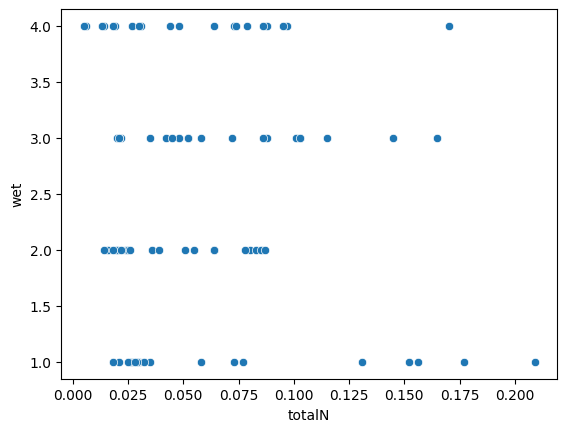

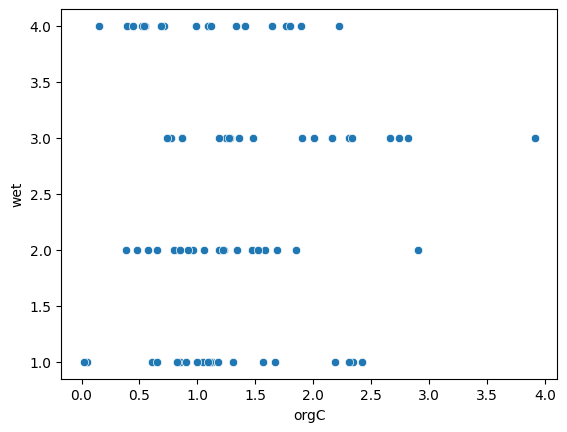

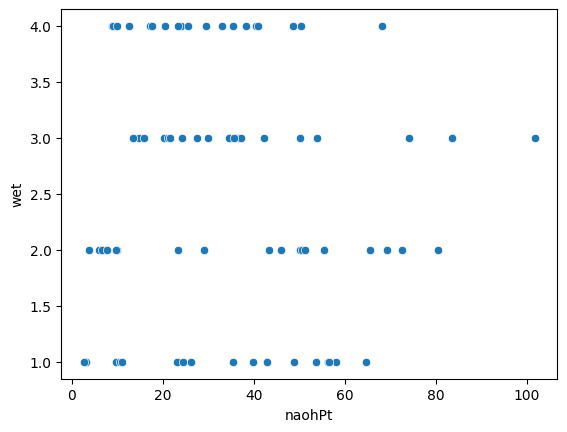

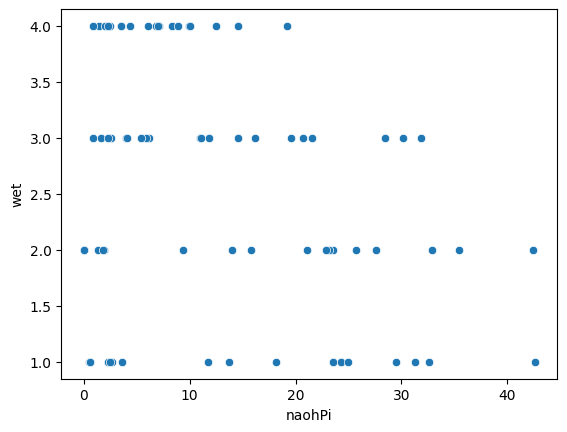

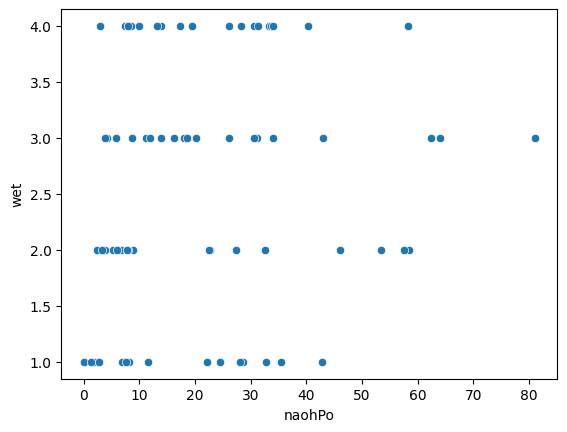

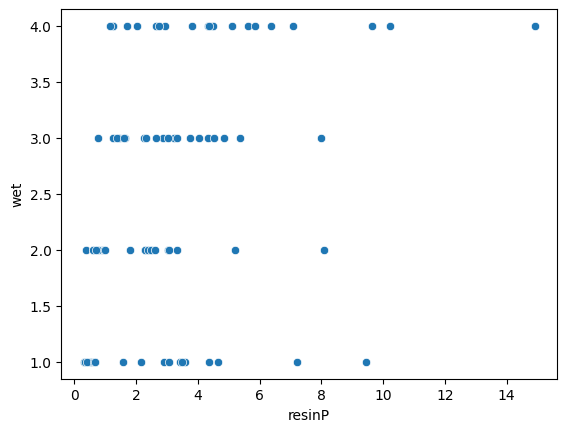

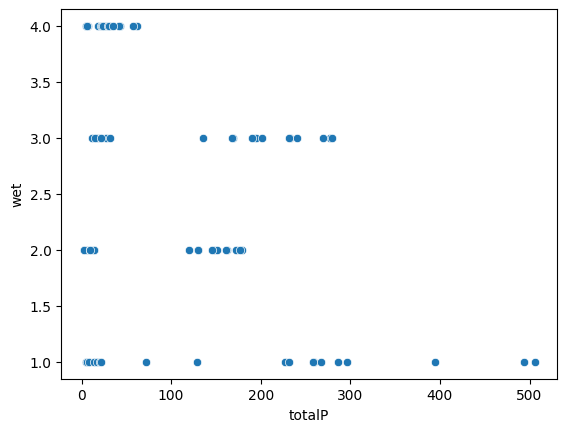

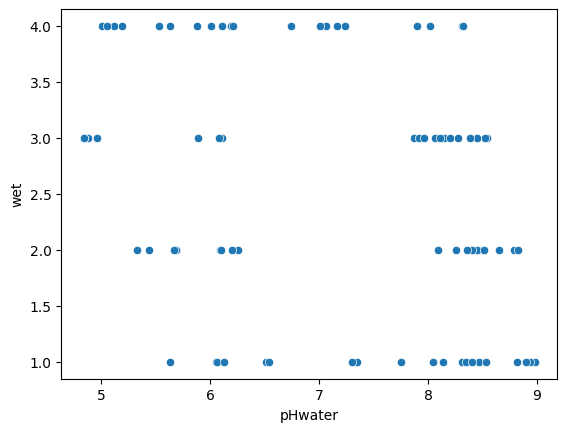

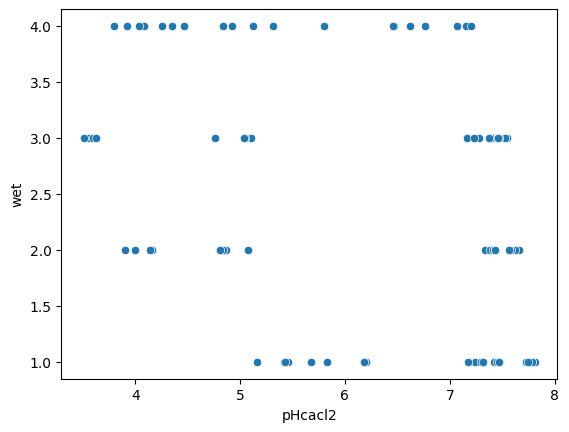

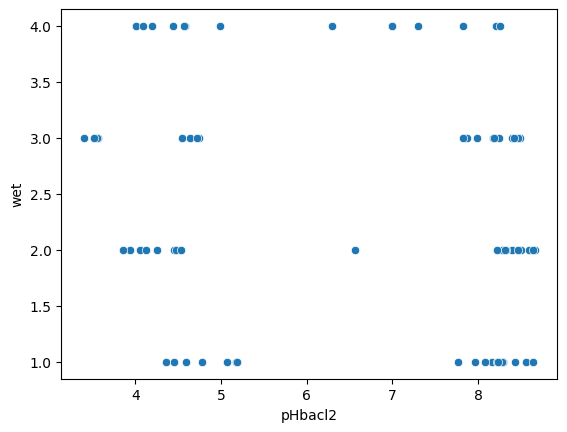

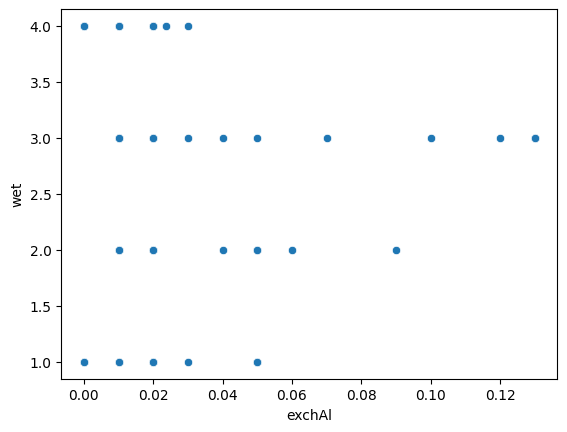

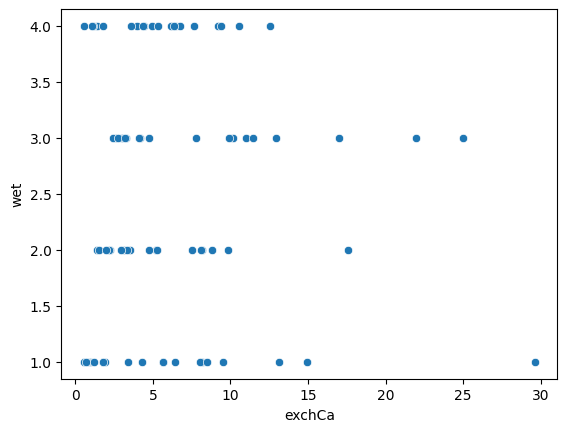

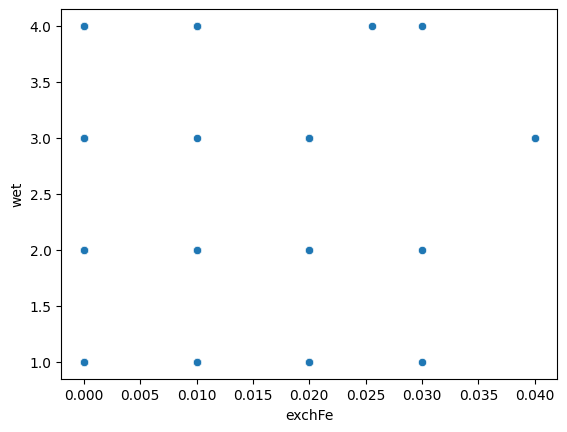

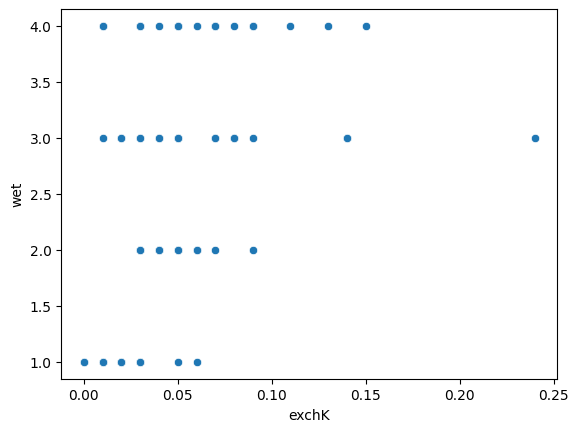

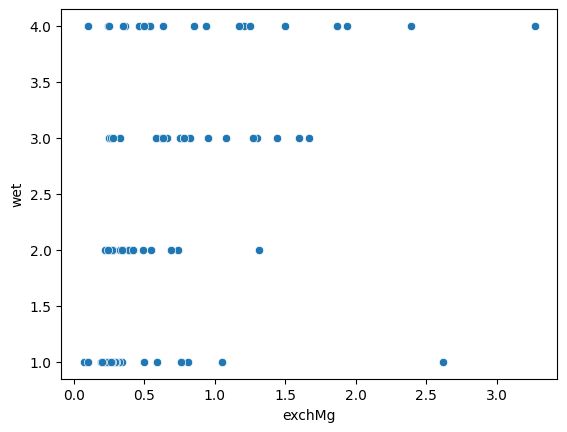

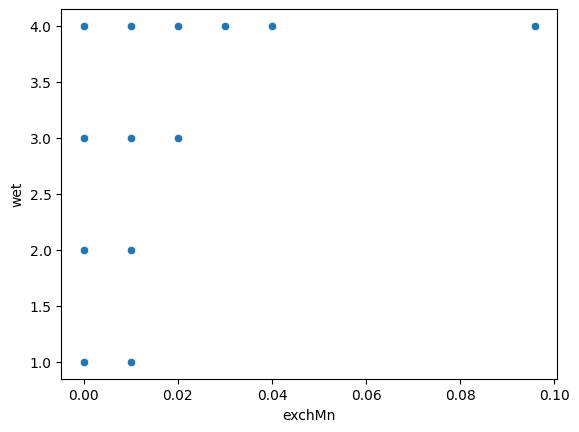

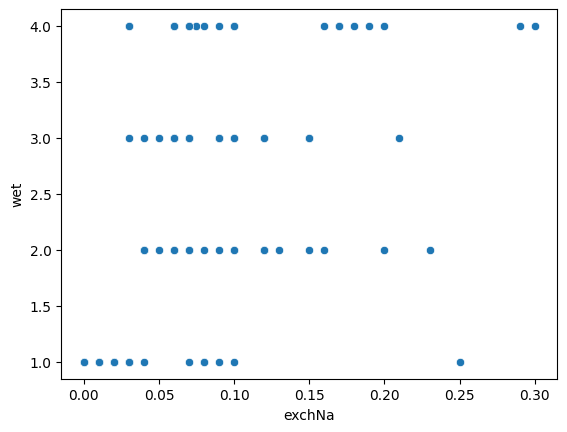

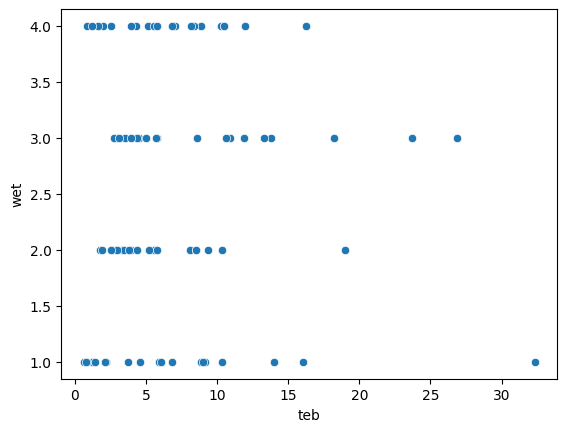

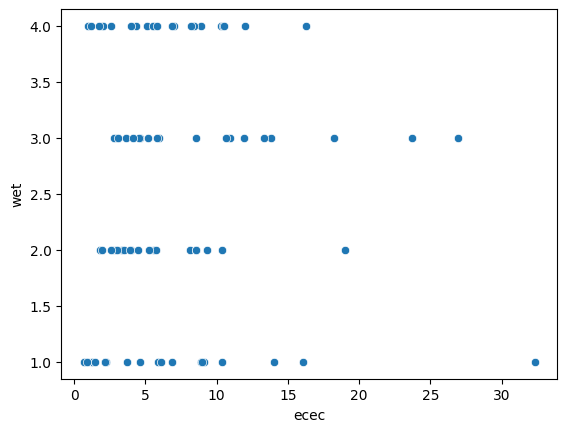

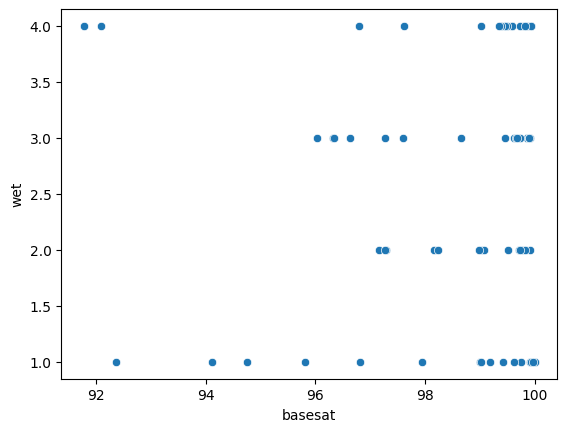

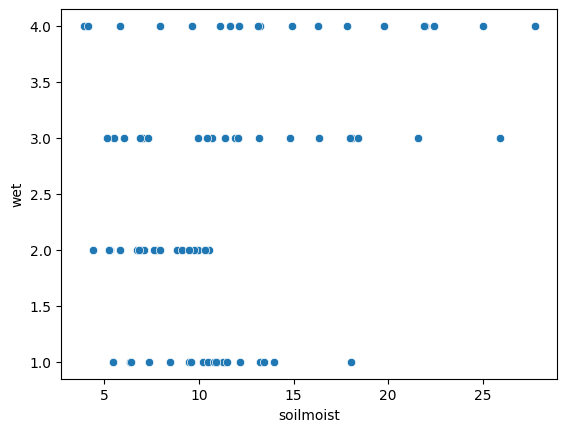

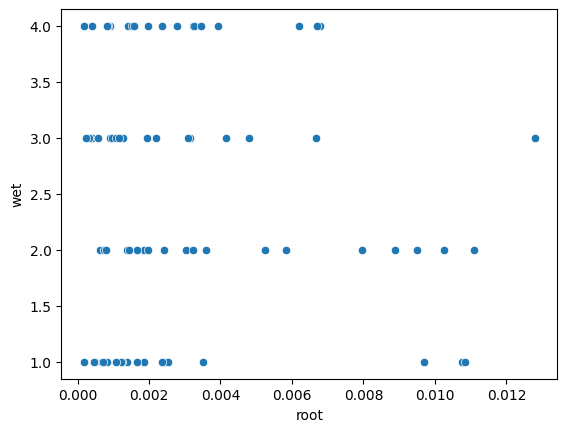

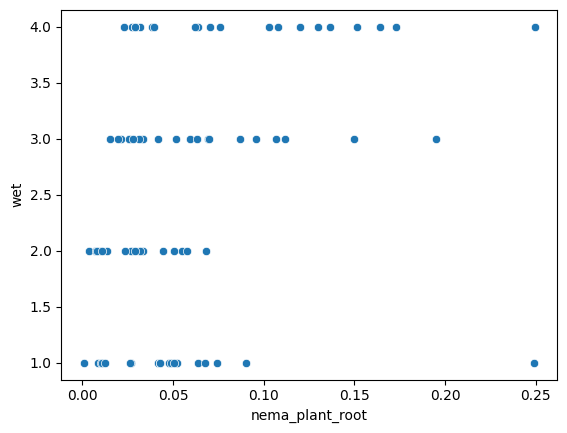

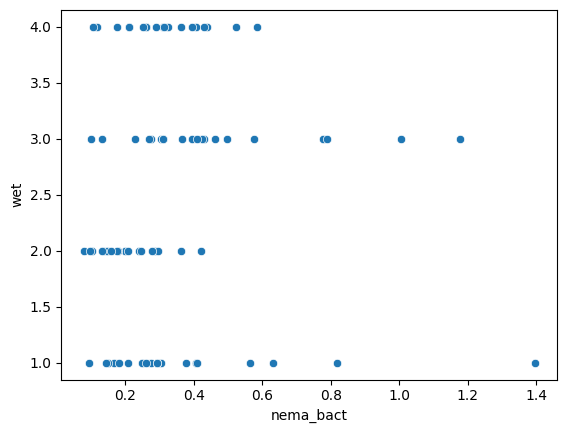

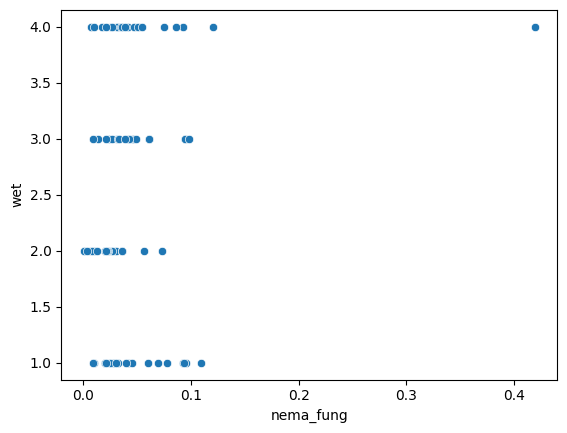

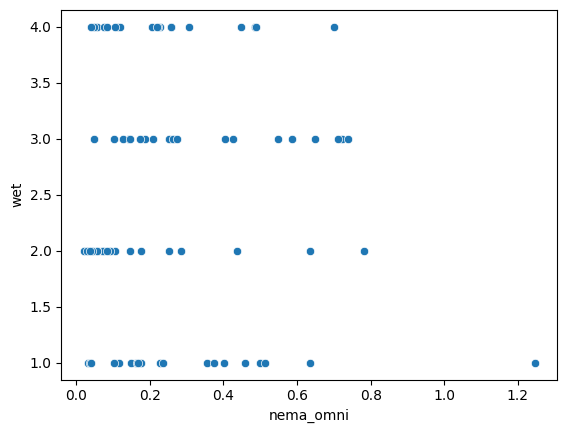

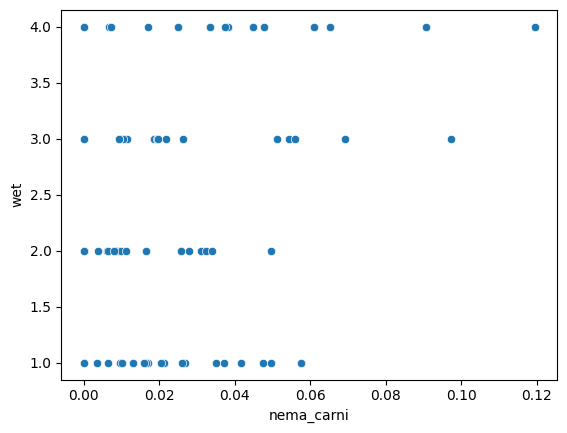

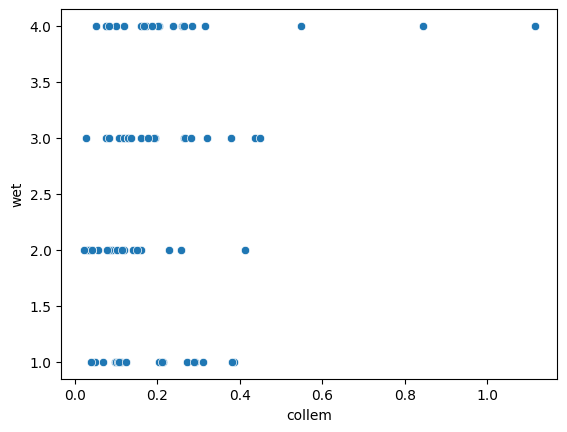

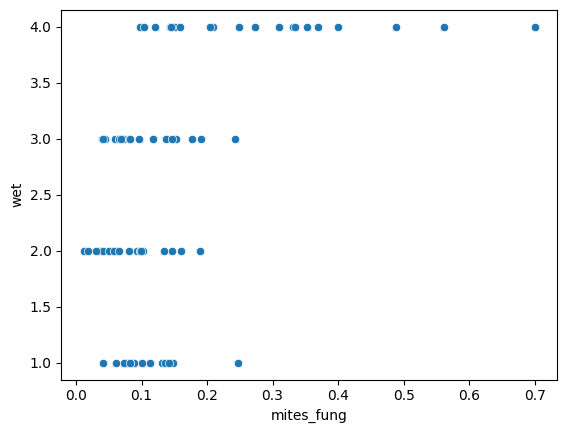

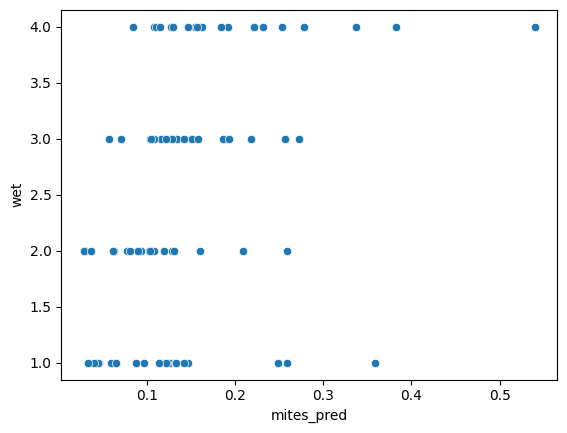

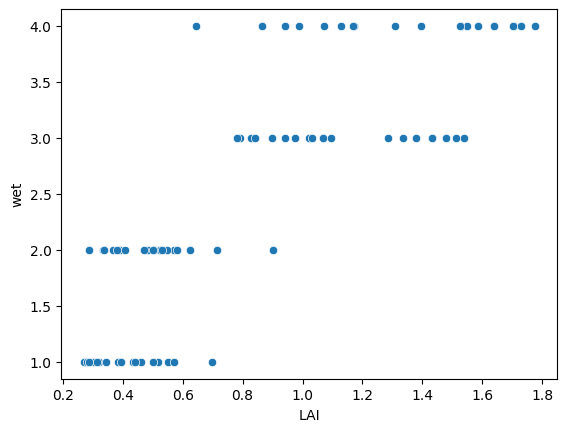

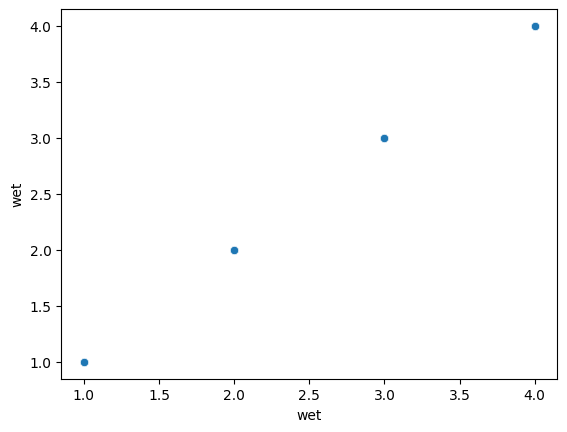

In [ ]:
for i in ['Unnamed: 0', 'stage', 'stagenum', 'bact', 'fung', 'bulkdens', 'co3',
       'inorgC', 'totalC', 'totalN', 'orgC', 'naohPt', 'naohPi', 'naohPo',
       'resinP', 'totalP', 'pHwater', 'pHcacl2', 'pHbacl2', 'exchAl', 'exchCa',
       'exchFe', 'exchK', 'exchMg', 'exchMn', 'exchNa', 'teb', 'ecec',
       'basesat', 'soilmoist', 'root', 'nema_plant_root', 'nema_bact',
       'nema_fung', 'nema_omni', 'nema_carni', 'collem', 'mites_fung',
       'mites_pred', 'LAI', 'wet']:
       sb.scatterplot(data=dataset,x=i,y='wet')
       plt.show()


In [ ]:
corr1=dataset.select_dtypes(include='number').corr()

<Axes: >

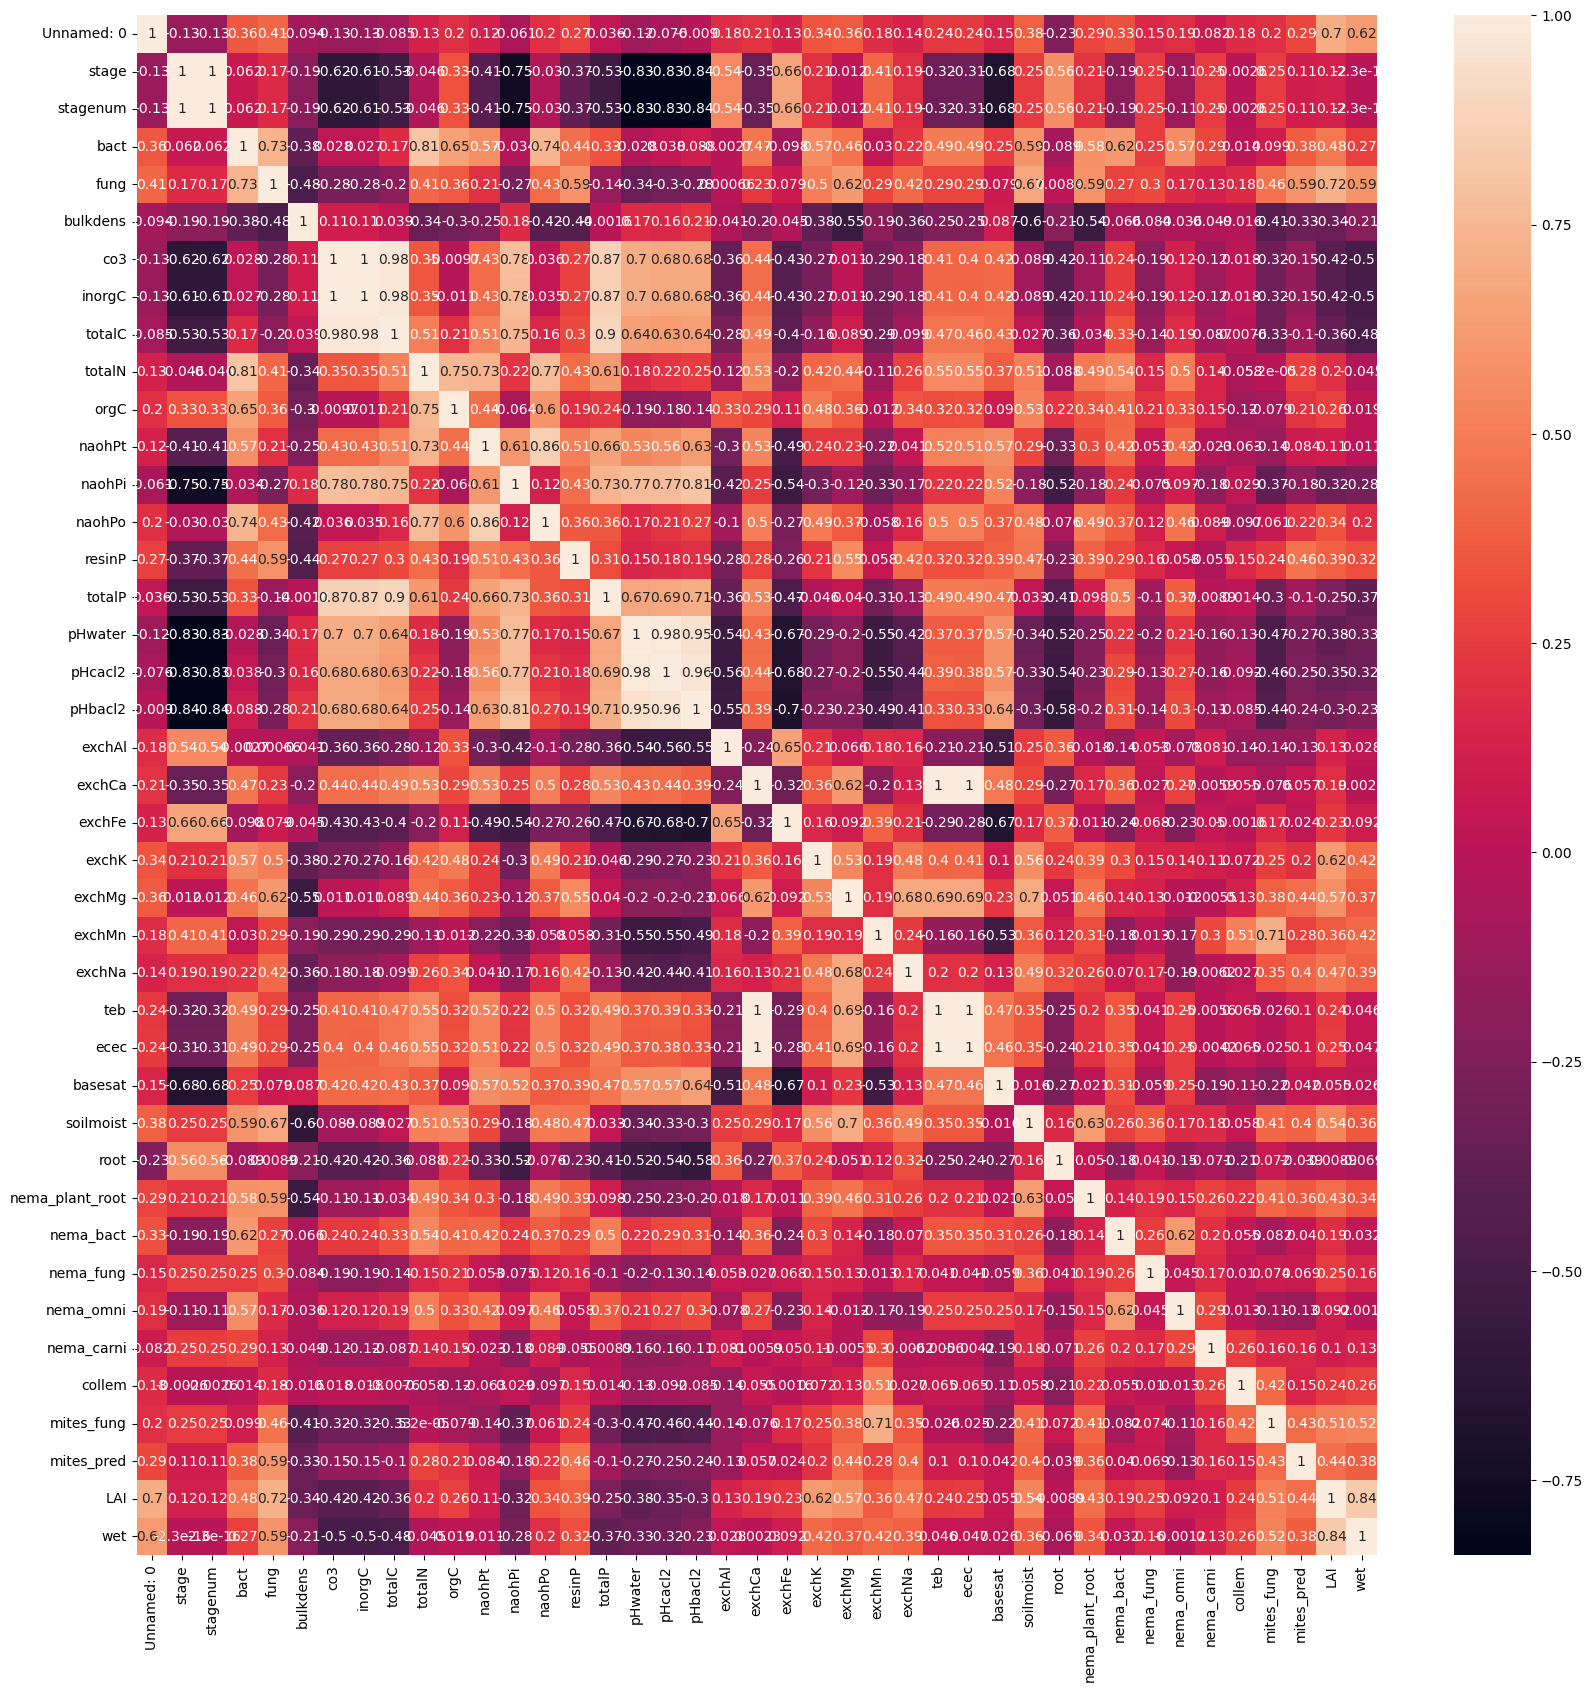

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr1,annot=True)

In [ ]:
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lower=q1-1.5*iqr
  upper=q3+1.5*iqr
  return lower,upper






In [ ]:
for i in ['fung', 'bulkdens', 'co3',
       'inorgC', 'totalC', 'totalN', 'orgC', 'naohPt', 'naohPi', 'naohPo',
       'resinP', 'totalP', 'pHwater', 'pHcacl2', 'pHbacl2', 'exchAl', 'exchCa',
       'exchFe', 'exchK', 'exchMg', 'exchMn', 'exchNa', 'teb', 'ecec',
       'basesat', 'soilmoist', 'root', 'nema_plant_root', 'nema_bact',
       'nema_fung', 'nema_omni', 'nema_carni', 'collem', 'mites_fung',
       'mites_pred']:
       lower,upper=wisker(dataset[i])
       dataset[i]=np.where(dataset[i]<lower,lower,dataset[i])
       dataset[i]=np.where(dataset[i]>upper,upper,dataset[i])


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


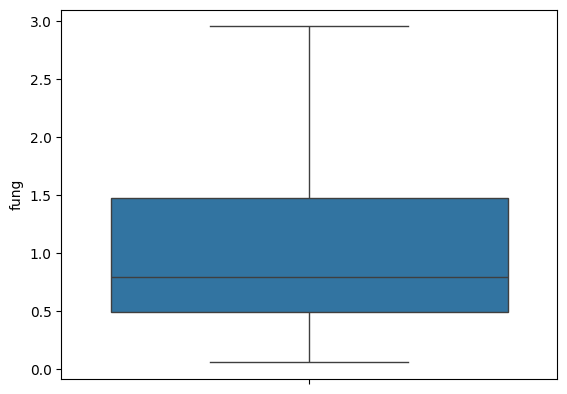

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


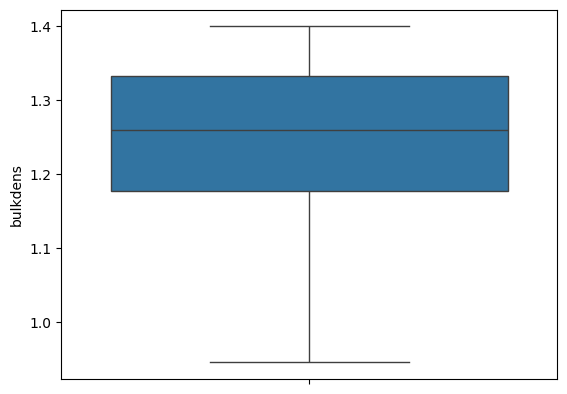

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


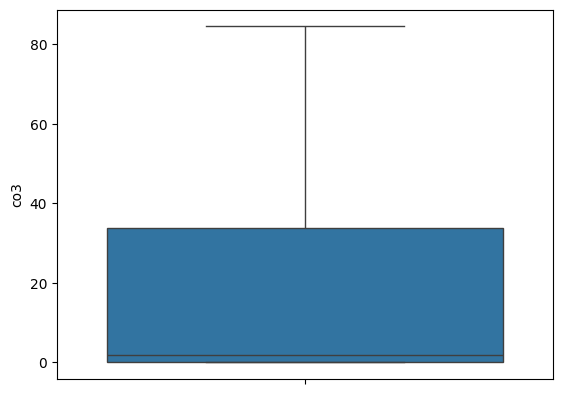

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


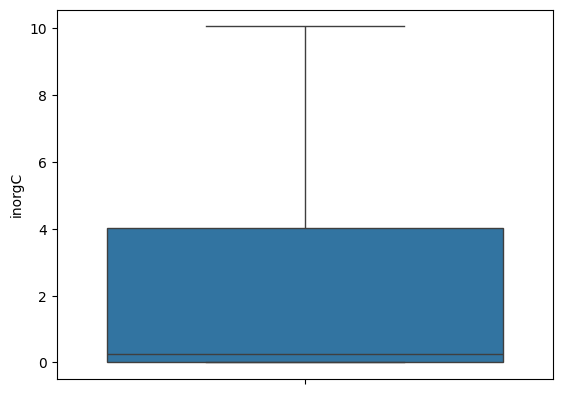

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


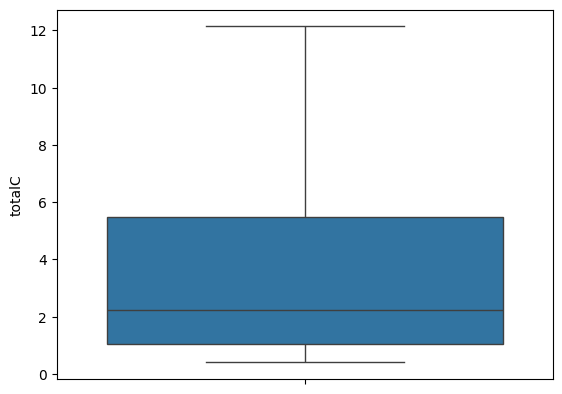

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


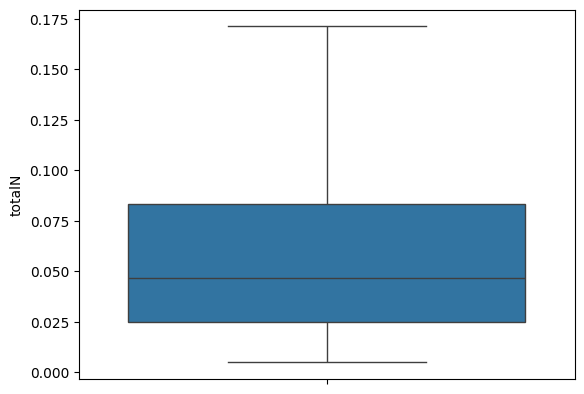

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


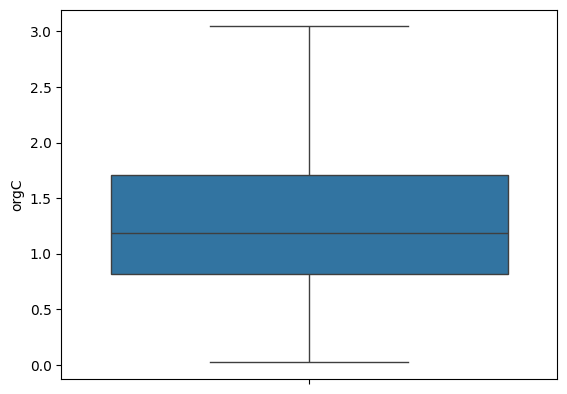

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


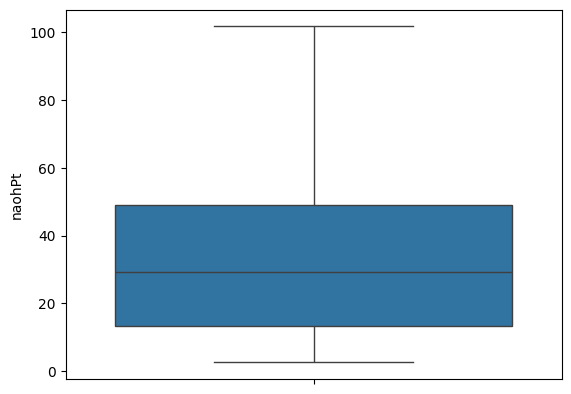

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


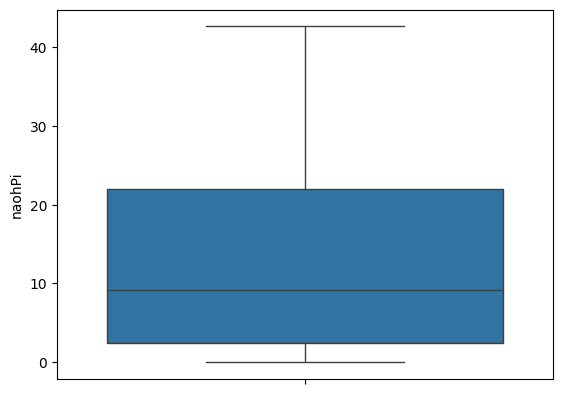

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


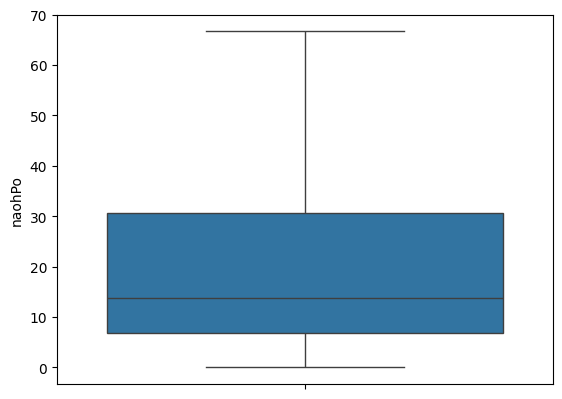

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


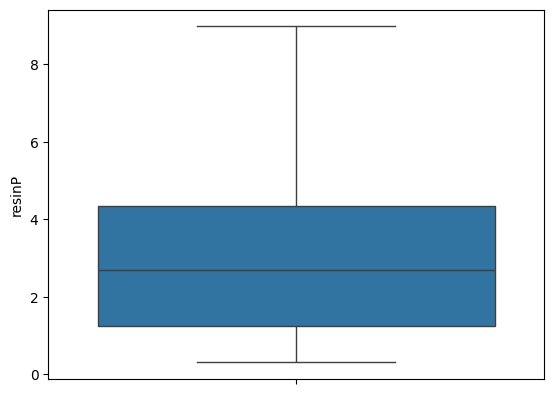

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


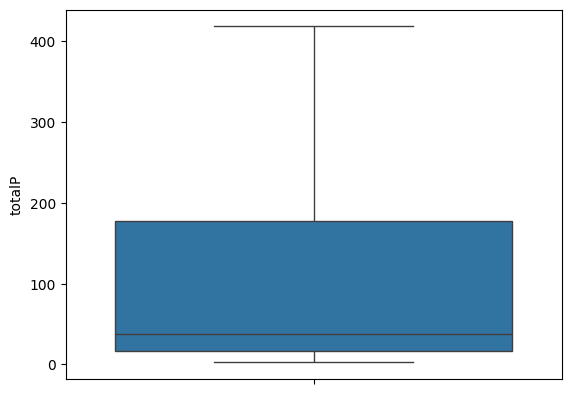

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


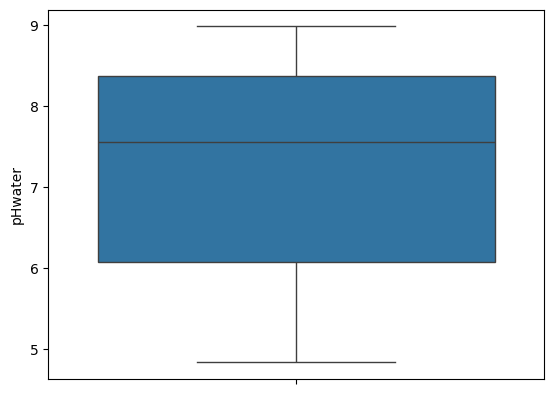

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


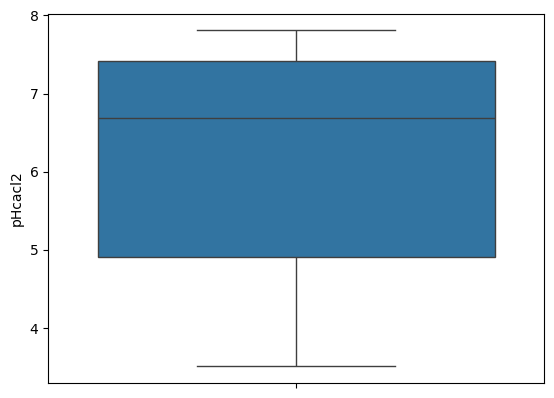

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


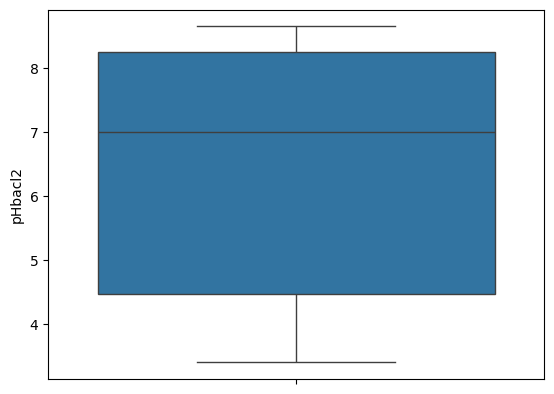

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


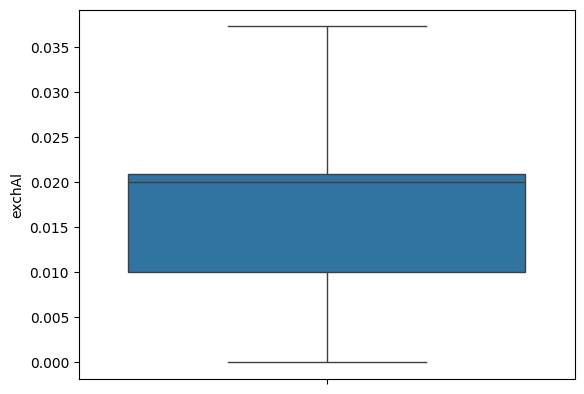

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


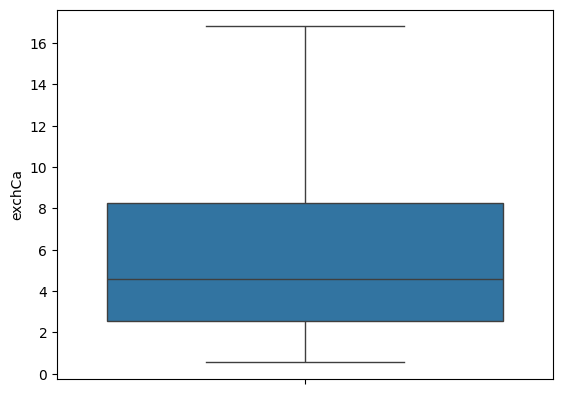

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


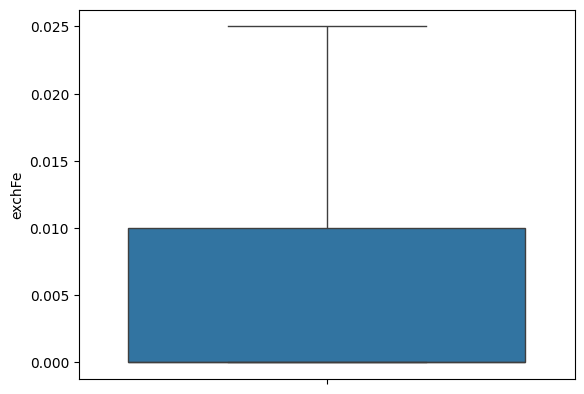

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


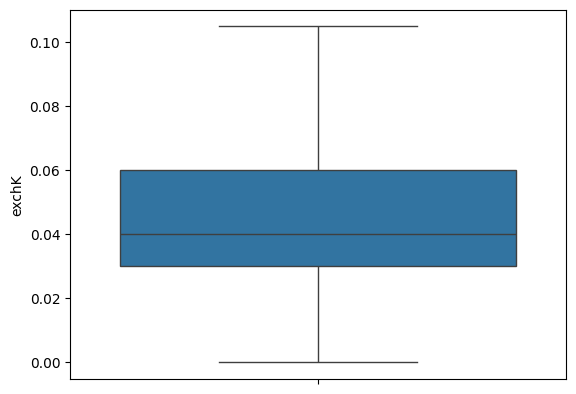

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


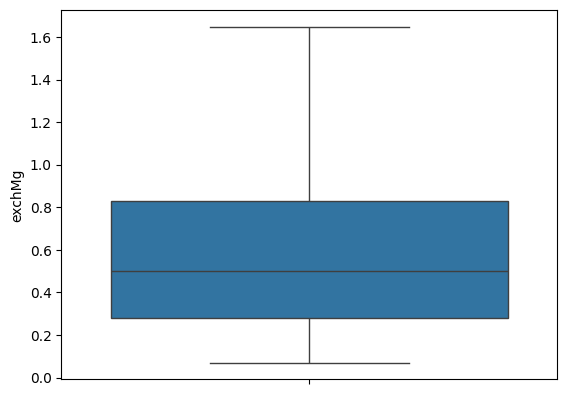

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


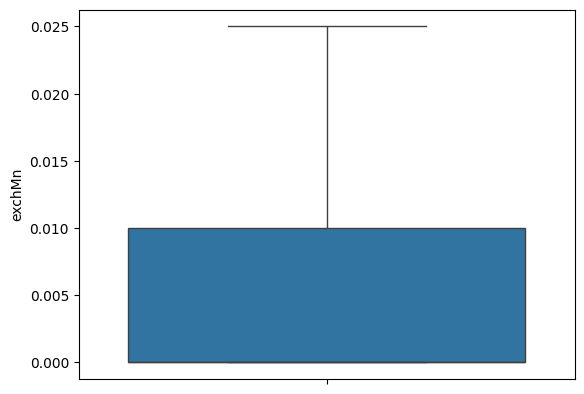

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


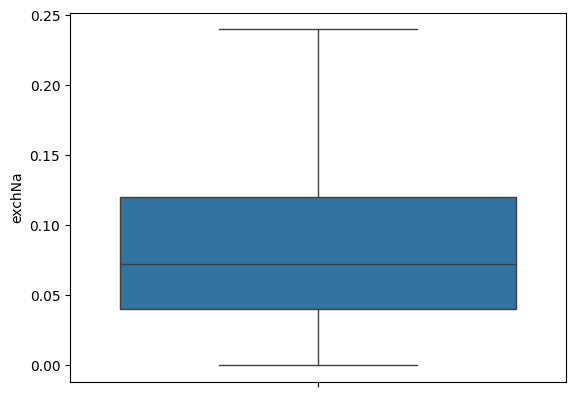

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


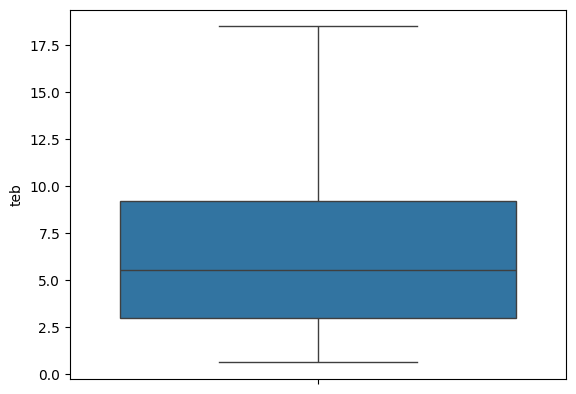

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


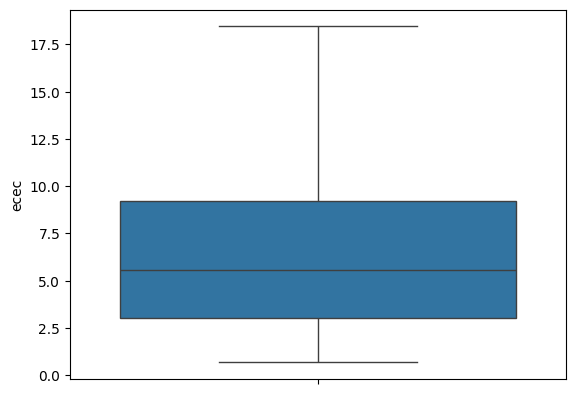

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


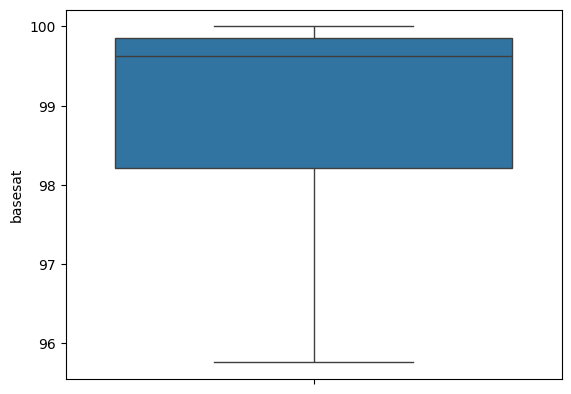

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


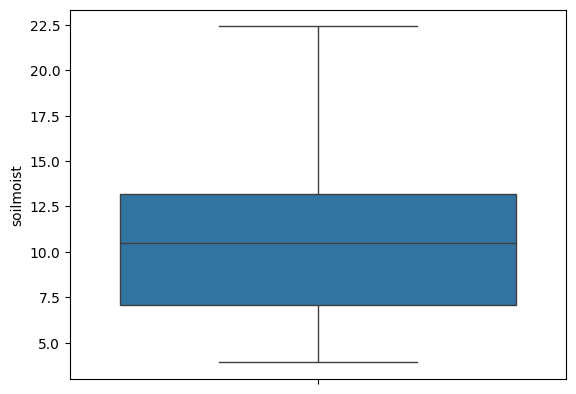

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


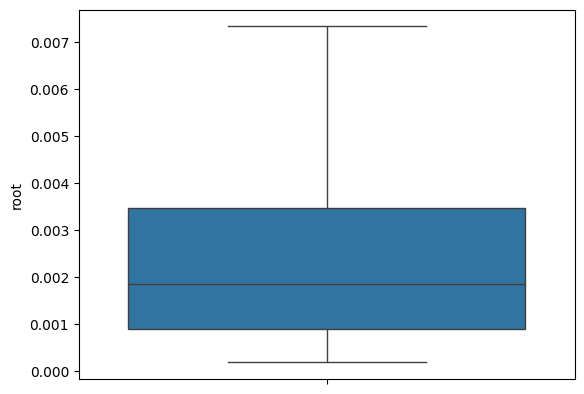

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


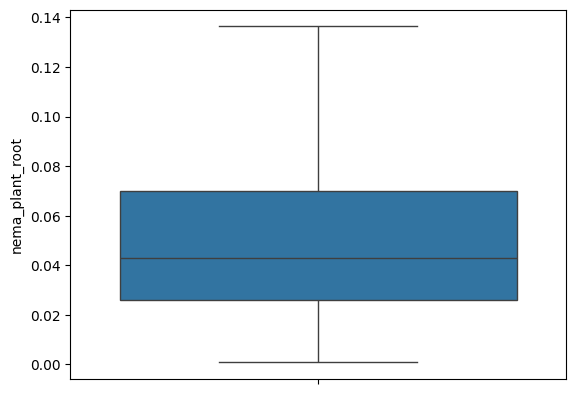

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


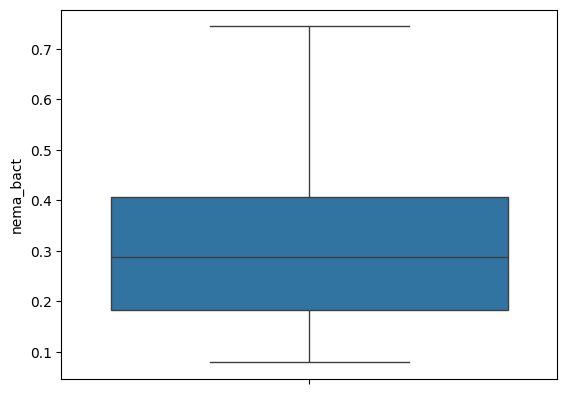

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


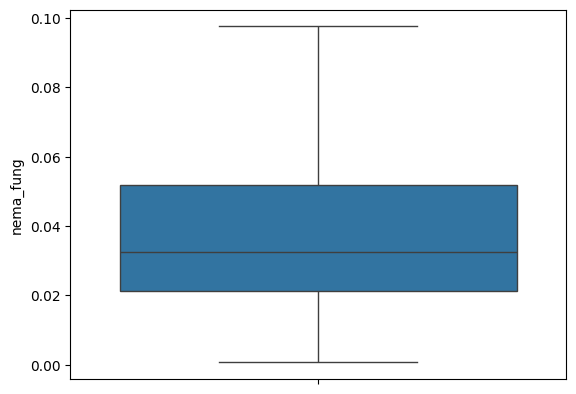

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


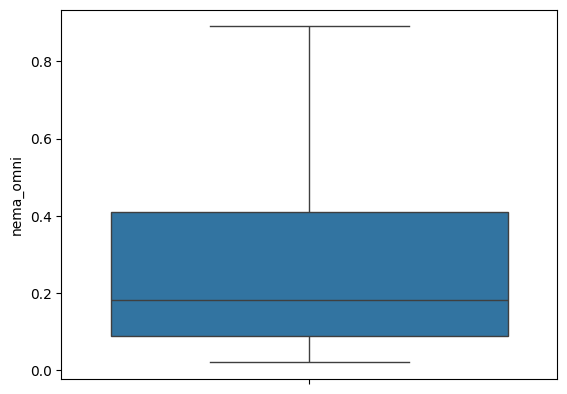

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


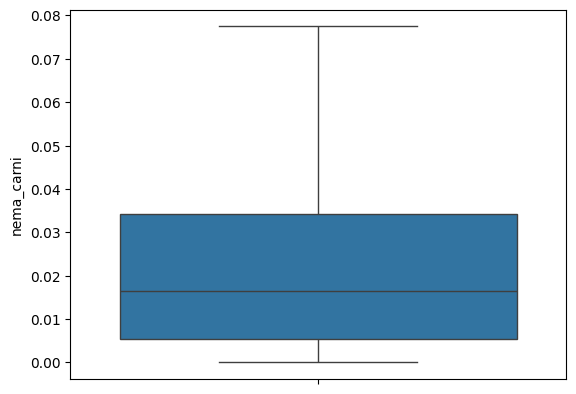

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


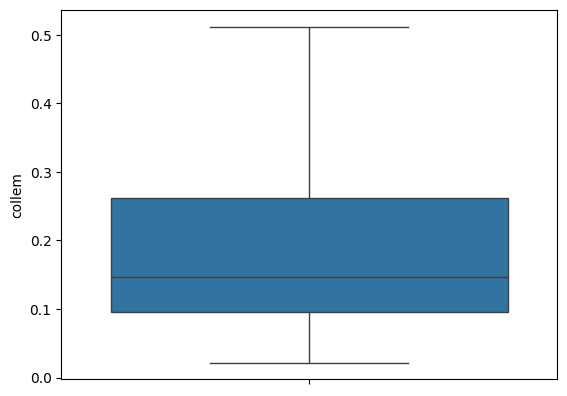

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


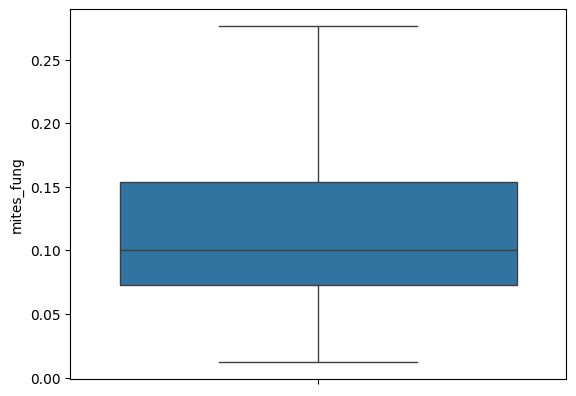

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


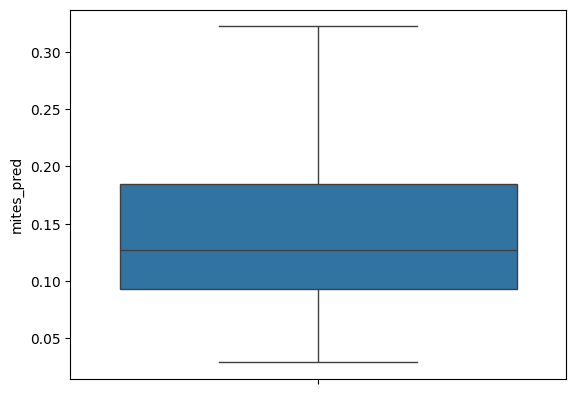

In [ ]:
for i in ['fung', 'bulkdens', 'co3',
       'inorgC', 'totalC', 'totalN', 'orgC', 'naohPt', 'naohPi', 'naohPo',
       'resinP', 'totalP', 'pHwater', 'pHcacl2', 'pHbacl2', 'exchAl', 'exchCa',
       'exchFe', 'exchK', 'exchMg', 'exchMn', 'exchNa', 'teb', 'ecec',
       'basesat', 'soilmoist', 'root', 'nema_plant_root', 'nema_bact',
       'nema_fung', 'nema_omni', 'nema_carni', 'collem', 'mites_fung',
       'mites_pred']:
       sb.boxplot(dataset[i])
       plt.show()

In [ ]:
dataset.select_dtypes(include='number').columns


Index(['Unnamed: 0', 'stage', 'stagenum', 'bact', 'fung', 'bulkdens', 'co3',
       'inorgC', 'totalC', 'totalN', 'orgC', 'naohPt', 'naohPi', 'naohPo',
       'resinP', 'totalP', 'pHwater', 'pHcacl2', 'pHbacl2', 'exchAl', 'exchCa',
       'exchFe', 'exchK', 'exchMg', 'exchMn', 'exchNa', 'teb', 'ecec',
       'basesat', 'soilmoist', 'root', 'nema_plant_root', 'nema_bact',
       'nema_fung', 'nema_omni', 'nema_carni', 'collem', 'mites_fung',
       'mites_pred', 'LAI', 'wet'],
      dtype='object')

In [ ]:
dataset.drop_duplicates()

,Unnamed: 0,plot,seq,seqcode,stage,stagenum,bact,fung,bulkdens,co3,...,nema_plant_root,nema_bact,nema_fung,nema_omni,nema_carni,collem,mites_fung,mites_pred,LAI,wet
0,1,B.HR.2,Jurien Bay,JB,5,5,0.072974,0.87048,1.10,0.0,...,0.063677,0.298357,0.041701,0.117603,0.026776,0.048686,0.078552,0.114601,0.4625,1
1,2,B.L.4,Jurien Bay,JB,5,5,0.056706,0.31806,1.10,0.0,...,0.041813,0.166463,0.095866,0.162888,0.017028,0.386764,0.085031,0.120934,0.2775,1
2,3,B.L.6,Jurien Bay,JB,5,5,0.046596,0.34038,1.10,0.0,...,0.042981,0.149079,0.044966,0.149128,0.003582,0.112980,0.076646,0.046183,0.2700,1
3,4,B.NL.1,Jurien Bay,JB,5,5,0.058274,0.49290,1.10,0.0,...,0.027029,0.209083,0.077870,0.176190,0.021166,0.103829,0.113702,0.097130,0.3200,1
4,5,GUI-BAS-A,Guilderton,GUI,5,5,0.064782,0.54312,1.31,0.0,...,0.054793,0.135409,0.056683,0.070539,0.031071,0.118796,0.146756,0.128624,0.5725,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,YAL-QY-D,Yalgorup,YAL,1,1,0.047991,0.20646,1.27,35.0,...,0.025523,0.311511,0.008769,0.102615,0.019371,0.266327,0.081576,0.104467,0.8400,3
76,77,YAL-SY-A,Yalgorup,YAL,4,4,0.172266,2.06088,1.40,0.0,...,0.027700,0.274455,0.042734,0.145840,0.026280,0.281955,0.068617,0.273065,1.4325,3
77,78,YAL-SY-B,Yalgorup,YAL,4,4,0.081805,0.53010,1.40,0.0,...,0.070022,0.131608,0.021442,0.173227,0.019755,0.129972,0.041222,0.070839,1.0300,3
78,79,YAL-SY-C,Yalgorup,YAL,4,4,0.111494,0.90396,1.40,0.0,...,0.062935,0.268582,0.032945,0.049639,0.021865,0.137011,0.081729,0.193115,1.3350,3


In [ ]:
dataset.head()

,Unnamed: 0,plot,seq,seqcode,stage,stagenum,bact,fung,bulkdens,co3,...,nema_plant_root,nema_bact,nema_fung,nema_omni,nema_carni,collem,mites_fung,mites_pred,LAI,wet
0,1,B.HR.2,Jurien Bay,JB,5,5,0.072974,0.87048,1.10,0.0,...,0.063677,0.298357,0.041701,0.117603,0.026776,0.048686,0.078552,0.114601,0.4625,1
1,2,B.L.4,Jurien Bay,JB,5,5,0.056706,0.31806,1.10,0.0,...,0.041813,0.166463,0.095866,0.162888,0.017028,0.386764,0.085031,0.120934,0.2775,1
2,3,B.L.6,Jurien Bay,JB,5,5,0.046596,0.34038,1.10,0.0,...,0.042981,0.149079,0.044966,0.149128,0.003582,0.112980,0.076646,0.046183,0.2700,1
3,4,B.NL.1,Jurien Bay,JB,5,5,0.058274,0.49290,1.10,0.0,...,0.027029,0.209083,0.077870,0.176190,0.021166,0.103829,0.113702,0.097130,0.3200,1
4,5,GUI-BAS-A,Guilderton,GUI,5,5,0.064782,0.54312,1.31,0.0,...,0.054793,0.135409,0.056683,0.070539,0.031071,0.118796,0.146756,0.128624,0.5725,2


In [ ]:
updated=pd.get_dummies(data=dataset,columns=['plot','seq','seqcode'])

In [ ]:
updated

,Unnamed: 0,stage,stagenum,bact,fung,bulkdens,co3,inorgC,totalC,totalN,...,plot_YAL-SY-C,plot_YAL-SY-D,seq_Guilderton,seq_Jurien Bay,seq_Warren,seq_Yalgorup,seqcode_GUI,seqcode_JB,seqcode_WAR,seqcode_YAL
0,1,5,5,0.072974,0.87048,1.10,0.0,0.0,1.127,0.027,...,False,False,False,True,False,False,False,True,False,False
1,2,5,5,0.056706,0.31806,1.10,0.0,0.0,1.046,0.026,...,False,False,False,True,False,False,False,True,False,False
2,3,5,5,0.046596,0.34038,1.10,0.0,0.0,1.003,0.025,...,False,False,False,True,False,False,False,True,False,False
3,4,5,5,0.058274,0.49290,1.10,0.0,0.0,1.310,0.035,...,False,False,False,True,False,False,False,True,False,False
4,5,5,5,0.064782,0.54312,1.31,0.0,0.0,0.965,0.020,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,1,1,0.047991,0.20646,1.27,35.0,4.2,4.946,0.021,...,False,False,False,False,False,True,False,False,False,True
76,77,4,4,0.172266,2.06088,1.40,0.0,0.0,2.664,0.086,...,False,False,False,False,False,True,False,False,False,True
77,78,4,4,0.081805,0.53010,1.40,0.0,0.0,1.281,0.035,...,False,False,False,False,False,True,False,False,False,True
78,79,4,4,0.111494,0.90396,1.40,0.0,0.0,1.267,0.042,...,True,False,False,False,False,True,False,False,False,True


In [ ]:
# sb.pairplot(dataset,vars=['stage', 'stagenum', 'bact', 'fung', 'bulkdens', 'co3',
#        'inorgC', 'totalC', 'totalN', 'orgC', 'naohPt', 'naohPi', 'naohPo',
#        'resinP', 'totalP', 'pHwater', 'pHcacl2', 'pHbacl2', 'exchAl', 'exchCa',
#        'exchFe', 'exchK', 'exchMg', 'exchMn', 'exchNa', 'teb', 'ecec',
#        'basesat', 'soilmoist', 'root', 'nema_plant_root', 'nema_bact',
#        'nema_fung', 'nema_omni', 'nema_carni', 'collem', 'mites_fung',
#        'mites_pred', 'LAI', 'wet'])
# plt.show()

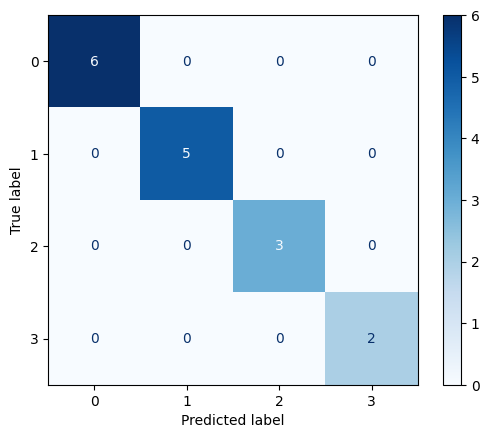

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
X = updated.drop('wet', axis=1)
y = updated['wet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
dataset.head()

,Unnamed: 0,plot,seq,seqcode,stage,stagenum,bact,fung,bulkdens,co3,...,nema_plant_root,nema_bact,nema_fung,nema_omni,nema_carni,collem,mites_fung,mites_pred,LAI,wet
0,1,B.HR.2,Jurien Bay,JB,5,5,0.072974,0.87048,1.10,0.0,...,0.063677,0.298357,0.041701,0.117603,0.026776,0.048686,0.078552,0.114601,0.4625,1
1,2,B.L.4,Jurien Bay,JB,5,5,0.056706,0.31806,1.10,0.0,...,0.041813,0.166463,0.095866,0.162888,0.017028,0.386764,0.085031,0.120934,0.2775,1
2,3,B.L.6,Jurien Bay,JB,5,5,0.046596,0.34038,1.10,0.0,...,0.042981,0.149079,0.044966,0.149128,0.003582,0.112980,0.076646,0.046183,0.2700,1
3,4,B.NL.1,Jurien Bay,JB,5,5,0.058274,0.49290,1.10,0.0,...,0.027029,0.209083,0.077870,0.176190,0.021166,0.103829,0.113702,0.097130,0.3200,1
4,5,GUI-BAS-A,Guilderton,GUI,5,5,0.064782,0.54312,1.31,0.0,...,0.054793,0.135409,0.056683,0.070539,0.031071,0.118796,0.146756,0.128624,0.5725,2


ANOVA

In [ ]:
# for i in range(36):
#     col_name = f"col{i+1}"
#     globals()[col_name] = dataset.iloc[:, 6+i]
# cols = {}
# for i in range(36):
#     cols[f"col{i+1}"] = dataset.iloc[:, 6+i]
# cols = [dataset.iloc[:, 6+i] for i in range(36)]
# relevant_cols = dataset.iloc[:, 6:43]
# sum1=0
# for i in range(80):
#   sum1=sum1+col1[i]
# column_sums=relevant_cols.sum().tolist()
# print("Column sums:", column_sums)
# T=sum(column_sums)
# len(column_sums)
# T_2=T*T
# N=relevant_cols.size
# correction_factor=T_2/N
# squared_arr=[x ** 2 for x in column_sums]
# squared_sum=sum(squared_arr)
# SSC=squared_sum-correction_factor
# print("The SSC is",SSC)
# col1_squared= [x ** 2 for x in col1]
# print(col1_squared)
# Assigning columns to variables
for i in range(36):
    col_name = f"col{i+1}"
    globals()[col_name] = dataset.iloc[:, 6+i]
cols = {}
for i in range(36):
    cols[f"col{i+1}"] = dataset.iloc[:, 6+i]

cols = [dataset.iloc[:, 6+i] for i in range(36)]

relevant_cols = dataset.iloc[:, 6:43]

column_sums = relevant_cols.sum().tolist()
print("Column sums:", column_sums)

T = sum(column_sums)

N = relevant_cols.size

T_2 = T * T
correction_factor = T_2 / N

squared_arr = [x ** 2 for x in column_sums]
squared_sum = sum(squared_arr)
SSC = squared_sum - correction_factor
print("The SSC is", SSC)

column_means = relevant_cols.mean()

SSW = 0
for i in range(36):
    col = relevant_cols.iloc[:, i]
    col_mean = column_means[i]
    deviations = col - col_mean
    squared_deviations = deviations ** 2
    SSW += squared_deviations.sum()

print("The SSW is", SSW)

overall_mean = relevant_cols.values.flatten().mean()
SST = 0
for i in range(36):
    col = relevant_cols.iloc[:, i]
    deviations = col - overall_mean
    squared_deviations = deviations ** 2
    SST += squared_deviations.sum()

print("The SST is", SST)

df_between = len(column_sums) - 1
df_within = N - len(column_sums)

MSC = SSC / df_between
MSW = SSW / df_within

F = MSC / MSW

print("F-statistic:", F)


Column sums: [10.043921300000001, 87.24283500000001, 99.89999999999999, 1612.4249999999997, 193.25, 299.50412500000004, 4.7005, 103.86625000000001, 2617.7, 1002.5, 1600.5874999999999, 250.22500000000002, 8417.6425, 573.5799999999999, 492.59999999999997, 514.54, 1.4299300000000001, 472.61855, 0.5700000000000001, 3.67007, 52.051339999999996, 0.325, 7.0945800000000006, 538.9095299999999, 541.80455, 7912.19375, 892.6926669904999, 0.21465482418715148, 4.2932986, 25.5196822, 3.2374362, 21.002981625, 1.7583142625, 14.522990991636128, 10.063127124970217, 11.304228680170954, 67.91]
The SSC is 148872722.65665442
The SSW is 1133529.0896846484
The SST is 2718004.136071789
F-statistic: 10663.7210452197


<ipython-input-23-7fa8276807de>:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  col_mean = column_means[i]


In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

KFold(n_splits=10, random_state=None, shuffle=False)
Fold 0:
  Train: index=[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
  Test:  index=[0 1 2 3 4 5 6 7]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
  Test:  index=[ 8  9 10 11 12 13 14 15]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
  Test:  index=[16 17 18 19 20 21 22 23]
Fold 3:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 32 33 

In [ ]:
import warnings
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

pca = PCA(n_components=0.95)

for name, model in models.items():
    print(f"Evaluating {name}...")

    accuracies, precisions, recalls, f1_scores = [], [], [], []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    print(f"{name} Results:")
    print(f"Mean Accuracy: {np.mean(accuracies):.4f} (std: {np.std(accuracies):.4f})")
    print(f"Mean Precision: {np.mean(precisions):.4f} (std: {np.std(precisions):.4f})")
    print(f"Mean Recall: {np.mean(recalls):.4f} (std: {np.std(recalls):.4f})")
    print(f"Mean F1-Score: {np.mean(f1_scores):.4f} (std: {np.std(f1_scores):.4f})")
    print("-" * 50)


Evaluating Logistic Regression...
Logistic Regression Results:
Mean Accuracy: 0.5875 (std: 0.1375)
Mean Precision: 0.5708 (std: 0.2078)
Mean Recall: 0.5875 (std: 0.1375)
Mean F1-Score: 0.5488 (std: 0.1553)
--------------------------------------------------
Evaluating Random Forest...
Random Forest Results:
Mean Accuracy: 0.8500 (std: 0.0935)
Mean Precision: 0.9027 (std: 0.0881)
Mean Recall: 0.8500 (std: 0.0935)
Mean F1-Score: 0.8531 (std: 0.0998)
--------------------------------------------------
Evaluating SVM...
SVM Results:
Mean Accuracy: 0.5875 (std: 0.1772)
Mean Precision: 0.6208 (std: 0.2143)
Mean Recall: 0.5875 (std: 0.1772)
Mean F1-Score: 0.5645 (std: 0.1842)
--------------------------------------------------
Evaluating KNN...
KNN Results:
Mean Accuracy: 0.8375 (std: 0.0800)
Mean Precision: 0.8906 (std: 0.1100)
Mean Recall: 0.8375 (std: 0.0800)
Mean F1-Score: 0.8450 (std: 0.0909)
--------------------------------------------------
